In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df =  yf.download('^NSEI',start="2010-01-01",end = None)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

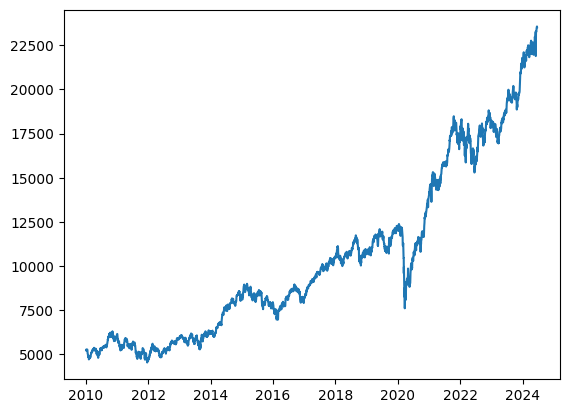

In [5]:
plt.plot(df['Close'])
plt.show()

##### for RSI 14 period the calculation of N is important if we are using python exponential formula. The alpha for rsi period 14 based on Wilder is 1/14. So substituting the alpha=2/(N+1) the N will be 27.

In [6]:
import warnings
warnings.filterwarnings('ignore')

df['priceChange']=df['Close']-df['Close'].shift(1)
df=df.dropna()
df['Upmove']=df['priceChange'].apply(lambda x: x if x>0 else 0)
df['Downmove']=df['priceChange'].apply(lambda x: abs(x) if x<0 else 0)
df['avgUp']=df['Upmove'].ewm(span=27).mean()
df['avgDown']=df['Downmove'].ewm(span=27).mean()
# df=df.dropna()
df['RS']= df['avgUp']/df['avgDown']
df['RSI_cal']= df['RS'].apply(lambda x: 100-(100/(x+1)))
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,priceChange,Upmove,Downmove,avgUp,avgDown,RS,RSI_cal
Date,,,,,,,,,,,,,
2024-05-22,22576.599609,22629.500000,22483.150391,22597.800781,22597.800781,290300,68.750000,68.750000,0.000000,62.820726,43.777612,1.434997,58.932182
2024-05-23,22614.099609,22993.599609,22577.449219,22967.650391,22967.650391,369800,369.849609,369.849609,0.000000,84.751361,40.650640,2.084872,67.583739
2024-05-24,22930.750000,23026.400391,22908.000000,22957.099609,22957.099609,261900,-10.550781,0.000000,10.550781,78.697692,38.500650,2.044061,67.149151
2024-05-27,23038.949219,23110.800781,22871.199219,22932.449219,22932.449219,260000,-24.650391,0.000000,24.650391,73.076429,37.511346,1.948115,66.080025
2024-05-28,22977.150391,22998.550781,22858.500000,22888.150391,22888.150391,217900,-44.298828,0.000000,44.298828,67.856684,37.996166,1.785882,64.104730
2024-05-29,22762.750000,22825.500000,22685.449219,22704.699219,22704.699219,269900,-183.451172,0.000000,183.451172,63.009778,48.385809,1.302237,56.563980
2024-05-30,22617.449219,22705.750000,22417.000000,22488.650391,22488.650391,373400,-216.048828,0.000000,216.048828,58.509079,60.361739,0.969307,49.220726
2024-05-31,22568.099609,22653.750000,22465.099609,22530.699219,22530.699219,572100,42.048828,42.048828,0.000000,57.333347,56.050186,1.022893,50.565850
2024-06-03,23337.900391,23338.699219,23062.300781,23263.900391,23263.900391,569400,733.201172,733.201172,0.000000,105.609620,52.046602,2.029136,66.987283


In [7]:
import pandas_ta as ta
# Calculate RSI
df['RSI'] = ta.rsi(df['Close'],length=14).round(1)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,priceChange,Upmove,Downmove,avgUp,avgDown,RS,RSI_cal,RSI
Date,,,,,,,,,,,,,,
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,45.699707,45.699707,0.000000,45.699707,0.000000,inf,100.000000,NaN
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,3.899902,3.899902,0.000000,24.025734,0.000000,inf,100.000000,NaN
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,-18.699707,0.000000,18.699707,15.416879,6.700443,2.300874,69.704997,NaN
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,-18.350098,0.000000,18.350098,11.124244,9.944142,1.118673,52.800646,NaN
2010-01-11,5263.799805,5287.200195,5227.799805,5249.399902,5249.399902,0,4.649902,4.649902,0.000000,9.630718,7.650190,1.258886,55.730395,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,23344.449219,23441.949219,23295.949219,23322.949219,23322.949219,295600,58.099609,58.099609,0.000000,141.160302,96.049304,1.469665,59.508679,59.5
2024-06-13,23480.949219,23481.050781,23353.900391,23398.900391,23398.900391,268300,75.951172,75.951172,0.000000,136.502507,89.188640,1.530492,60.481995,60.5
2024-06-14,23464.949219,23490.400391,23334.250000,23465.599609,23465.599609,223100,66.699219,66.699219,0.000000,131.516558,82.818022,1.588019,61.360401,61.4


#### Strategy to buy when Rsi is below 30 and sell when above 70

In [59]:
# Dataframe filtered ----changed
fil = df.index > '2020-01-01'
df1=df[fil]

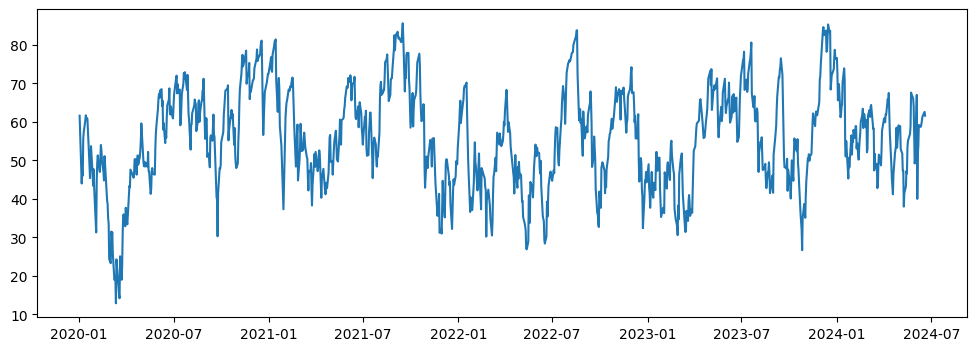

In [61]:
plt.figure(figsize=(12,4))
plt.plot(df1.RSI)

In [62]:
bi,si=[],[]
Buy, Sell=[],[]
Buyp,Sellp=[],[]
Flag = False
for i in range(1,len(df1)):
    if not Flag:
        if df1.RSI.iloc[i] > 30 and df1.RSI.iloc[i-1]<30:
            bi.append(i+1)
            Buy.append(df1.iloc[i+1].name)
            Buyp.append(df1.iloc[i+1].Open)
            Flag=True
    if Flag:
        if df1.RSI.iloc[i] < 70 and df1.RSI.iloc[i-1]>70 :   
            si.append(i+1)     
            Sell.append(df1.iloc[i+1].name)
            Sellp.append(df1.iloc[i+1].Open)
            Flag=False

In [63]:
bi

[43, 588, 948]

In [64]:
si

[127, 655, 984]

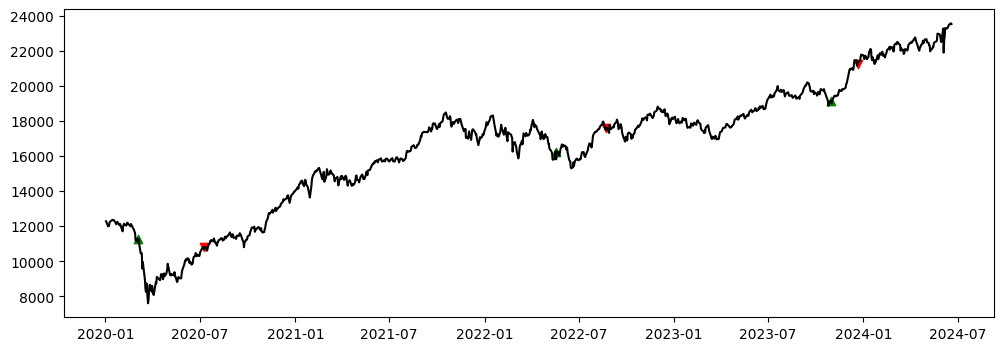

In [65]:
plt.figure(figsize=(12,4))
plt.scatter(df1.iloc[bi].index,df1.iloc[bi].Close,marker="^",color='green')
plt.scatter(df1.iloc[si].index,df1.iloc[si].Close,marker="v",color='red')
plt.plot(df1.Close,label ='Market Price',color='k')

In [66]:
frame = pd.DataFrame({'Buying_Dates':Buy,'Selling_Dates':Sell,'EntryPrice':Buyp,'ExitPrice':Sellp})

In [67]:
frame['profit']=frame['ExitPrice']-frame['EntryPrice']
frame

,Buying_Dates,Selling_Dates,EntryPrice,ExitPrice,profit
0,2020-03-04,2020-07-09,11351.349609,10755.549805,-595.799805
1,2022-05-18,2022-08-23,16318.150391,17357.349609,1039.199219
2,2023-10-30,2023-12-21,19053.400391,21033.949219,1980.548828
